<a href="https://colab.research.google.com/github/tselane2110/TOCI-III/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random                        
import itertools
import numpy as np                   
import matplotlib.pyplot as plt      
from sklearn.metrics import confusion_matrix

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used
from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.layers import Conv2D, MaxPool2D, Flatten #CNN
from keras.utils import np_utils                         # NumPy related tools
from tensorflow.keras.optimizers import RMSprop           # Optimizer

<h3><a href="https://colab.research.google.com/github/AviatorMoser/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb#scrollTo=iZwWHjcedU0KM">https://colab.research.google.com/github/AviatorMoser/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb#scrollTo=iZwWHjcedU0KM</a></h3>

In [ ]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


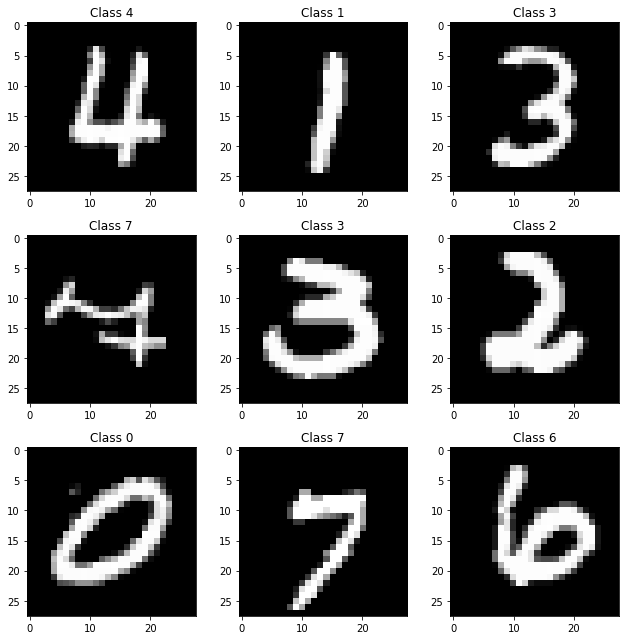

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3, 3, i+1)
    num = random.randint(0, len(x_train))
    plt.imshow(x_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [ ]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!  
num = random.randint(0, len(x_train))
print(y_train[num])
matprint(x_train[num])

4
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    7  154  190  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0   13   57    7    0    0    0    0    7  150  252  139  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0    0  144  252   65    0    0    0    0  117  252  224   43  0  0  0  0  
0  0  0  0    0    0    0    0    0    0    0    0   26  243  252   90    0    0    0   51  241  252  118    0  0  0  0  0 

<h3><a href="https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6">https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6</a></h3>



In [ ]:
#Normalization #scaling

X_train = x_train / 255                        # normalize each value for each pixel for the entire vector for each input
X_test = x_test / 255

In [ ]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
# Cannal is nymber of channels in the image for gray scale its 1 for rgb its 3, hsv 3

60000 * 28 * 28
60000 * 28 * 28 * 1

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
nb_classes = 10 # number of unique digits

0,1,2,3,4,5,6,7,8,9

0 => [1, 0, 0 , 0, 0, 0, 0, 0, 0, 0]
1 => [0, 1, 0 , 0, 0, 0, 0, 0, 0, 0]
2 => [0, 0, 1 , 0, 0, 0, 0, 0, 0, 0]


Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

optimizer = RMSprop(learning_rate = 0.001, rho = 0.9, epsilon = 1e-08, decay = 0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

In [ ]:
epochs = 1 # 
batch_size = 600

In [ ]:
history = model.fit(X_train,
                    Y_train, 
                    batch_size = batch_size,
                    epochs = epochs, 
                    steps_per_epoch = X_train.shape[0] / batch_size,
                    validation_data = (X_test,Y_test))

100/100 [==============================] - 282s 3s/step - loss: 0.4911 - accuracy: 0.8424 - val_loss: 0.0703 - val_accuracy: 0.9784


In [ ]:
# Predict the values from the validation dataset

#Test Data -> X_test
#Test labels -> Y_Test -> Actuall Label

Y_pred = model.predict(X_test)

#Predicted label -> Y_pred -> Predicted label

In [ ]:
print(Y_test[0])
print(Y_pred[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[6.44883080e-09 9.59067670e-09 5.95486767e-07 1.70377211e-06
 1.00917197e-09 3.45536733e-09 2.78640349e-12 9.99996543e-01
 1.03535704e-08 1.22627682e-06]


In [ ]:
# Convert actuall and predictions classes to one hot vectors 
Y_actuall_classes = np.argmax(Y_test, axis = 1)
Y_pred_classes = np.argmax(Y_pred, axis = 1) 

In [ ]:
print(Y_actuall_classes[0])
print(Y_pred_classes[0])

7
7


In [ ]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_actuall_classes - Y_pred_classes != 0)

#10000 true false
#0 True

#535 False

X_test_error = X_test[errors]
Y_actuall_classes_errors = Y_actuall_classes[errors]
Y_pred_classes_errors = Y_pred_classes[errors]

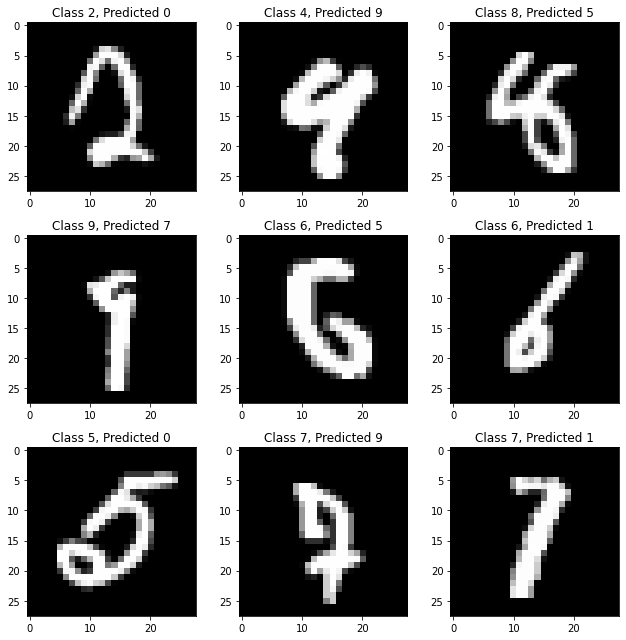

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3, 3, i+1)
    num = random.randint(0, len(X_test_error))
    plt.imshow(X_test_error[num].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title(f'Class {Y_actuall_classes_errors[num]}, Predicted {Y_pred_classes_errors[num]}')
    
plt.tight_layout()

<h1>🐍</h1>